In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Cleaning Dataframe</h1>

In [2]:
df = pd.read_csv('CSV_Files/Raw_House_details.csv')
#df.to_csv('CSV_Files/Raw_House_details.csv', index=False)

Get the lay of the land of the Dataframe

In [3]:
df.nunique()

Type of property                25
Location                      1561
postal code                    929
immo code                     8570
Price                         1357
Address                       1762
Bedrooms                        24
Energy class                    13
Primary energy consumption    1001
Furnished                        2
Terrace                          2
Terrace surface                128
Surface of the plot           1649
Living room surface            105
Number of frontages              9
Construction year              164
Building condition               7
Outdoor parking space            1
Bathrooms                       14
Shower rooms                    16
Office                           2
Toilets                         16
Kitchen type                     9
Heating type                     8
province                        11
dtype: int64

In [4]:
df.shape

(8570, 25)

In [5]:
df.head()

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
0,house,essen,2910,10666428,469000.0,Heidestatiestraat 26,3,D,390.0,0,...,0,0,0,1,0,0,2,Installed,0,Antwerp
1,house,bierges,1301,10666426,1395000.0,"Rue de Wavre, 27",5,C,178.0,0,...,1988,Good,0,2,3,1,4,Hyper equipped,Fuel oil,Walloon Brabant
2,apartment,arlon,6700,10666424,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
3,house,arlon,6700,10666423,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
4,apartment,antwerp,2000,10666422,425000.0,"Grote steenweg, 511",2,C,254.0,0,...,0,As new,0,1,0,0,0,Installed,0,Antwerp


Remove any missing values, strings and characters in the Price column that do not show sheer numeric value

In [6]:

df =df.replace({'€':'','\€':'','\)':'','\.':''},regex=True) 

In [7]:

df = df[df['Price'].notnull() & (df['Price'] != '')]

In [8]:
# Remove all strings from the column

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#converts the values from 'Price' to numeric type and those that are not numeric value converts to NaN. 
#Further dropped by dropna
df = df.dropna(subset=['Price'])

Replace any 'yes' or 'no' with binary numbers

In [9]:
replace_dataframe={'Yes':1,'No':0}
columns_to_convert=['Furnished','Terrace','Office']

df[columns_to_convert]=df[columns_to_convert].replace(replace_dataframe)

Remove the Outdoor parking space as the only result was 0

In [10]:
df =df.drop('Outdoor parking space', axis=1) 

In [11]:
round(df['Price'].describe())

count        8570.0
mean       464969.0
std       1011255.0
min            16.0
25%        239000.0
50%        335000.0
75%        479000.0
max      43900000.0
Name: Price, dtype: float64

In [12]:
df.shape

(8570, 24)

In [13]:
df = df.drop(df['Price'].nlargest(10).index)

In [14]:
df = df.drop(df['Price'].nsmallest(100).index)

In [15]:
df['Price'].min()

25000.0

In [16]:
df.shape

(8460, 24)

In [17]:
df.to_csv('CSV_Files/House_details.csv', index=False)

In [18]:
df.to_csv('CSV_Files/House_details.csv', index=False)

In [19]:
df.sort_values(by='Price',ascending=False).head()  # not df.head() as it will only give the first view of teh dataframe and that is then sorted

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
2983,house,knokke-zoute,8300,10658623,6495000.0,Kustlaan 277,5,B,125.0,0,...,4,2008,As new,4,0,1,5,Hyper equipped,Gas,West Flanders
8398,exceptional-property,knokke-heist,8300,10643422,6385000.0,Albert plein 10,4,D,357.0,0,...,4,0,Good,4,4,1,0,Installed,Fuel oil,West Flanders
4474,villa,knokke,8300,10654776,5850000.0,Dumortierlaan 89,7,NS,0.0,0,...,0,0,0,6,0,0,0,0,0,West Flanders
2381,house,knokke-heist,8300,10660118,5650000.0,Albert plein 10,6,A,74.0,0,...,4,2020,As new,3,2,0,3,USA hyper equipped,0,West Flanders
2984,house,knokke-heist,8300,10658622,5650000.0,Kustlaan 277,6,A,74.0,0,...,4,2020,As new,3,0,0,4,Hyper equipped,Gas,West Flanders


Inspect how many missing values are there in the dataframe

In [20]:
df.isnull().sum()

Type of property                0
Location                        0
postal code                     0
immo code                       0
Price                           0
Address                         0
Bedrooms                        0
Energy class                    0
Primary energy consumption      0
Furnished                       0
Terrace                         0
Terrace surface                 0
Surface of the plot             0
Living room surface             0
Number of frontages             0
Construction year               0
Building condition              0
Bathrooms                       0
Shower rooms                    0
Office                          0
Toilets                         0
Kitchen type                    0
Heating type                    0
province                      158
dtype: int64

In [21]:
#df = df[df.iloc[:, -1].astype(str).str.strip() != '']

df.dropna(subset=['province'], inplace=True)  # dropping missing values in column province

In [22]:
df.isnull().sum()

Type of property              0
Location                      0
postal code                   0
immo code                     0
Price                         0
Address                       0
Bedrooms                      0
Energy class                  0
Primary energy consumption    0
Furnished                     0
Terrace                       0
Terrace surface               0
Surface of the plot           0
Living room surface           0
Number of frontages           0
Construction year             0
Building condition            0
Bathrooms                     0
Shower rooms                  0
Office                        0
Toilets                       0
Kitchen type                  0
Heating type                  0
province                      0
dtype: int64

In [23]:
#df.to_csv('CSV_Files/House_details.csv', index=False)

In [24]:

df['Energy class'] = df['Energy class'].replace(['NS','G_F','C_B','G_A++','G'],0)
df['Energy class'] = df['Energy class'].replace('A++','A+')
df['Energy class'].unique()

array(['D', 'C', 0, 'E', 'F', 'B', 'A', 'A+'], dtype=object)

In [25]:
df['Province']=df['province'].replace('Province')

In [26]:
df['Province']=df['Province'].replace(['Luxembourg (shared with Eastern Hainaut','Brussels Capital Region','Hainaut'],['Luxembourg','Brussels','Henegouwen'])
df['Province'].unique()

array(['Antwerp', 'Walloon Brabant', 'Luxembourg', 'East Flanders',
       'Liège', 'Flemish Brabant', 'Brussels', 'Limburg', 'Hainaut (West',
       'West Flanders', 'Namur'], dtype=object)

<h1>Visualisation</h1>

**What is the correlation between the corresponding variables?**

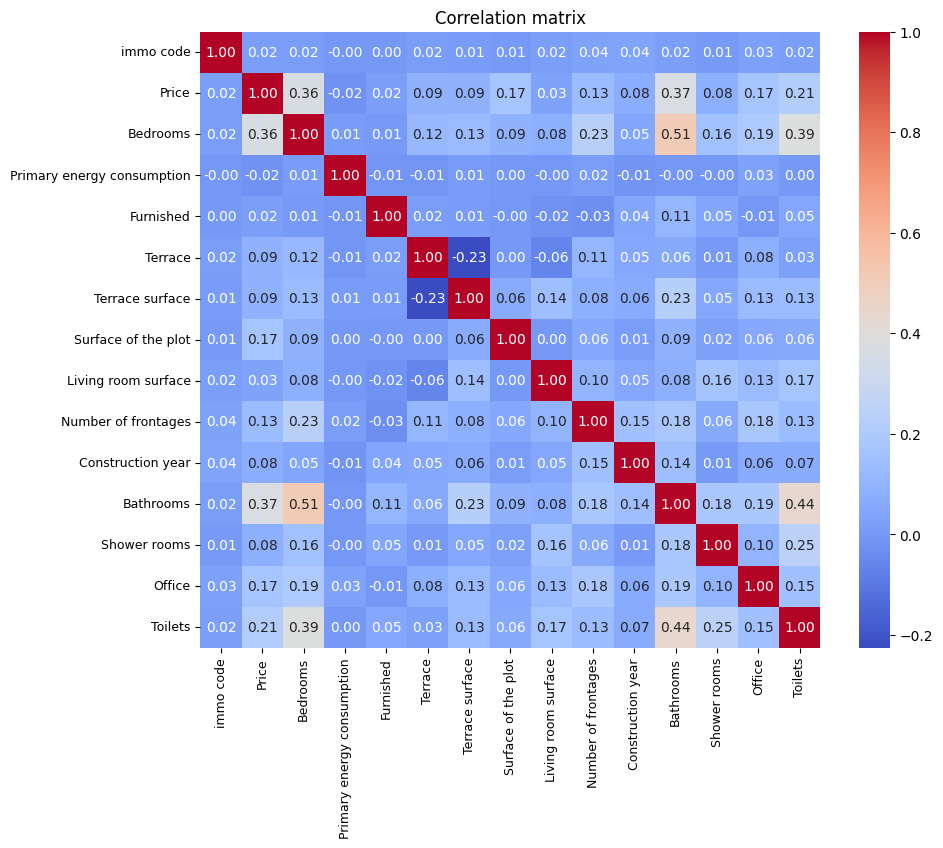

In [27]:
correlation_matrix=df.corr(numeric_only=True)

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.title('Correlation matrix')

plt.show()

**Provide a scatterplot between the price and construction year**

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

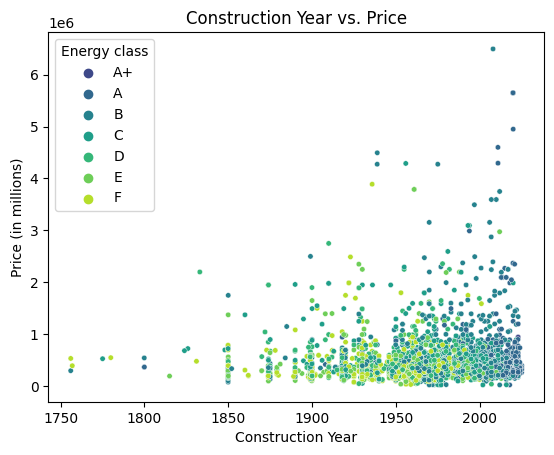

In [28]:



filtered_Construction_df = df[df['Construction year'] != 0]
filtered_Energy_df = df[df['Energy class'] != 0]


years = filtered_Construction_df['Construction year']
prices = df['Price']
categories = filtered_Energy_df['Energy class']


size = np.random.uniform(low=-0.1, high=0.1, size=len(years))
size_years = years + size

energy_order = ['A+', 'A+', 'A', 'B', 'C', 'D', 'E', 'F']

sns.scatterplot(x=size_years, y=prices, hue=categories, palette='viridis', s=15, hue_order=energy_order)


plt.xlabel('Construction Year')
plt.ylabel('Price (in millions)')
plt.title('Construction Year vs. Price')

plt.colorbar(label='Energy class')

# Display the plot
plt.show()



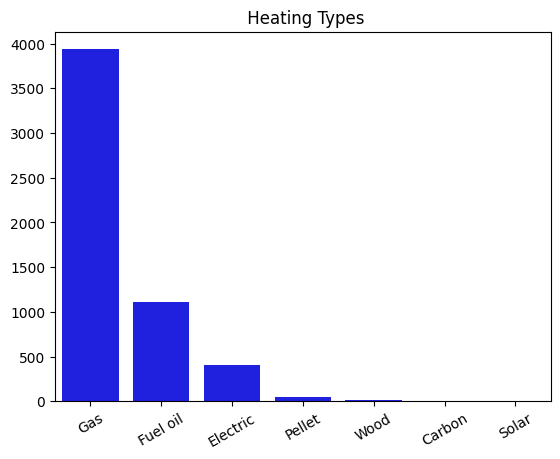

In [29]:


filtered_Heating_df = df[df['Heating type'] != '0']

filtered_Heating_df_order = ['Gas', 'Fuel oil', 'Electric', 'Pellet', 'Wood', 'Carbon', 'Solar']

sns.countplot(data= filtered_Heating_df,color='blue', x='Heating type',order=filtered_Heating_df_order)

plt.xticks(rotation=30) 
plt.xlabel('')
plt.ylabel('')
plt.title(' Heating Types')
plt.show()




In [ ]:
df.loc[df['Heating type']=='Wood']

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province,Province
971,manor-house,nothomb,6717,10664653,349000.0,Rue des Etangs 28,2,0,651.0,0,...,0,To renovate,1,0,0,1,0,Wood,Luxembourg (shared with Eastern Hainaut,Luxembourg
1652,house,floreffe,5150,10662927,159000.0,"Chaussée Nationale 4, b 21",5,F,456.0,0,...,0,To renovate,1,0,0,2,Semi equipped,Wood,Namur,Namur
1981,house,seraing,4100,10552511,90000.0,Rue des Fories 2,2,F,498.0,0,...,0,To renovate,1,0,0,1,0,Wood,Liège,Liège
1985,house,zwalm,9630,10661800,475000.0,Stationsstraat 76,3,D,398.0,0,...,1996,Good,1,0,0,1,0,Wood,East Flanders,East Flanders
2087,house,sint-niklaas,9111,10661460,275000.0,Gentse Baan 45A,2,D,321.0,0,...,1977,Good,1,0,1,0,Hyper equipped,Wood,East Flanders,East Flanders
2427,apartment-block,seneffe,7180,10660014,990000.0,Place Emile Delalieux 1,10,0,0.0,0,...,0,Good,7,7,0,7,Semi equipped,Wood,Hainaut (West,Hainaut (West
2887,house,vichte,8570,10658949,174000.0,Vichteplaats 13,2,F,1365.0,0,...,0,To renovate,1,0,0,0,0,Wood,West Flanders,West Flanders
3564,house,hulshout,2235,10656944,199000.0,Theofiel De Biestraat 11,1,E,459.0,0,...,2013,Good,0,0,0,1,Not installed,Wood,Antwerp,Antwerp
3969,house,kessel,2560,10655956,250000.0,Dorpsstraat 34 Bus 1,3,0,0.0,0,...,1900,To be done up,1,0,0,0,0,Wood,Antwerp,Antwerp
4026,house,oudenaarde,9700,10655780,596000.0,Damstraat 131 bus1,3,E,425.0,0,...,2005,0,1,0,0,0,Installed,Wood,East Flanders,East Flanders


In [ ]:
df['Type of property'].unique()


array(['house', 'apartment', 'villa', 'mixed-use-building', 'duplex',
       'service-flat', 'exceptional-property',
       'new-real-estate-project-houses', 'triplex', 'apartment-block',
       'other-property', 'country-cottage', 'loft', 'mansion',
       'town-house', 'new-real-estate-project-apartments', 'ground-floor',
       'penthouse', 'bungalow', 'kot', 'farmhouse', 'flat-studio',
       'chalet', 'manor-house', 'castle'], dtype=object)

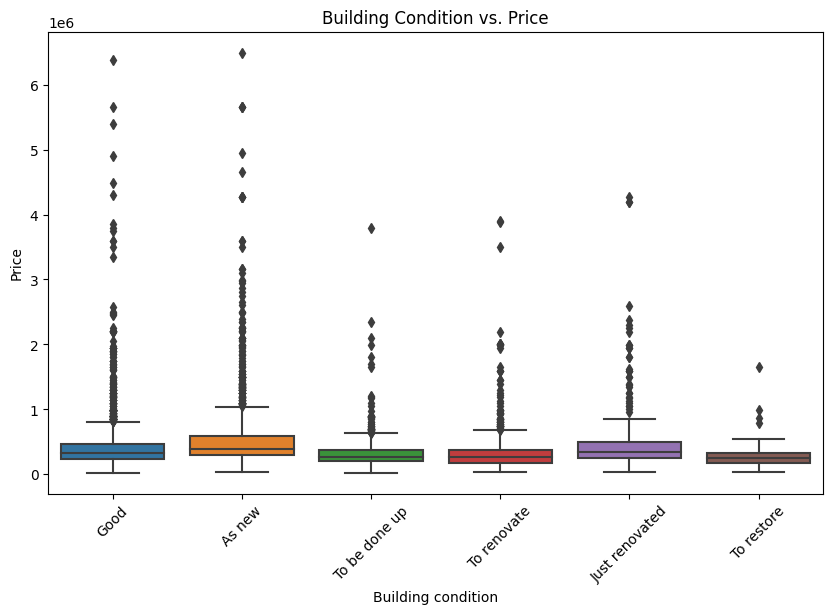

In [ ]:
filtered_Building_df = df[df['Building condition'] != '0']

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_Building_df, x='Building condition', y='Price')
plt.xticks(rotation=45)
plt.xlabel('Building condition')
plt.ylabel('Price')
plt.title('Building Condition vs. Price')
plt.show()


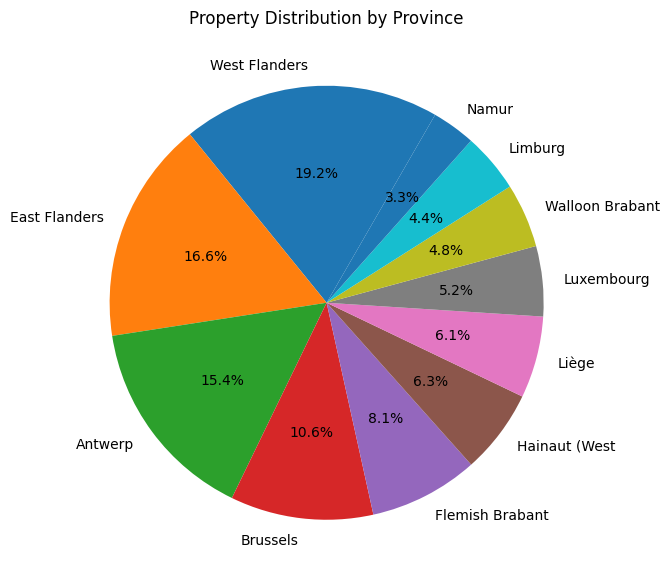

In [ ]:
province_counts = df['Province'].value_counts()

plt.figure(figsize=(7, 8)) 
plt.pie(province_counts, labels=province_counts.index, autopct='%1.1f%%', startangle=60)
plt.title('Property Distribution by Province')
plt.show()


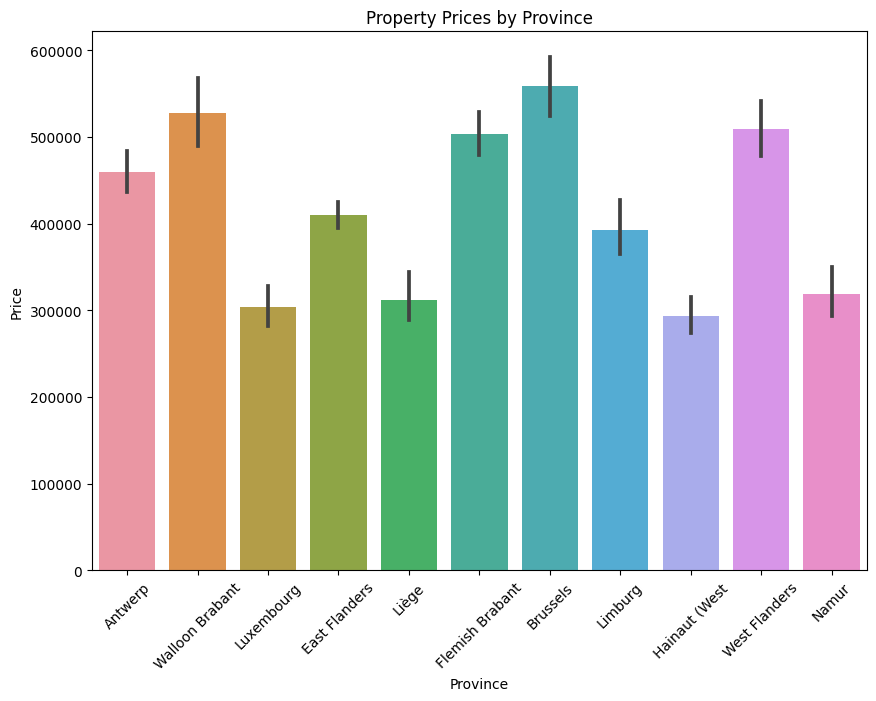

In [ ]:

plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='Province', y='Price')
plt.xticks(rotation=45)
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('Property Prices by Province')
plt.show()


In [ ]:
print(df.dtypes)

In [ ]:
df['Energy class'] = df['Energy class'].astype(str)


<Figure size 800x800 with 0 Axes>

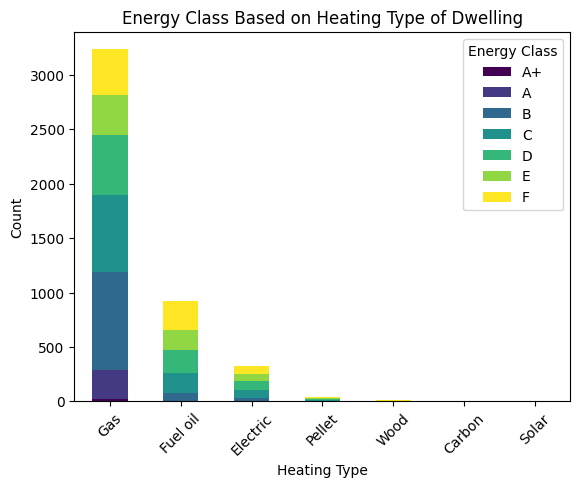

In [ ]:


filtered_Energy_df = df[df['Energy class'] != '0']
filtered_Heating_df = df[df['Heating type'] != '0']

plt.figure(figsize=(8, 8))
grouped_df = filtered_Heating_df.groupby(['Heating type', 'Energy class']).size().unstack(fill_value=0)

filtered_Heating_df_order = ['Gas', 'Fuel oil', 'Electric', 'Pellet', 'Wood', 'Carbon', 'Solar']
filtered_Energy_df_order = ['A+', 'A', 'B', 'C', 'D', 'E', 'F']

grouped_df = grouped_df.reindex(filtered_Heating_df_order, axis=0)
grouped_df = grouped_df[filtered_Energy_df_order]

grouped_df.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Heating Type')
plt.ylabel('Count')
plt.title('Energy Class Based on Heating Type of Dwelling')

plt.xticks(range(len(filtered_Heating_df_order)), filtered_Heating_df_order, rotation=45)

plt.legend(title='Energy Class')

plt.show()


In [ ]:
df.columns


Index(['Type of property', 'Location', 'postal code', 'immo code', 'Price',
       'Address', 'Bedrooms', 'Energy class', 'Primary energy consumption',
       'Furnished', 'Terrace', 'Terrace surface', 'Surface of the plot',
       'Living room surface', 'Number of frontages', 'Construction year',
       'Building condition', 'Bathrooms', 'Shower rooms', 'Office', 'Toilets',
       'Kitchen type', 'Heating type', 'province', 'Province'],
      dtype='object')

In [ ]:
df['Building condition'] = df['Building condition'].astype(str)

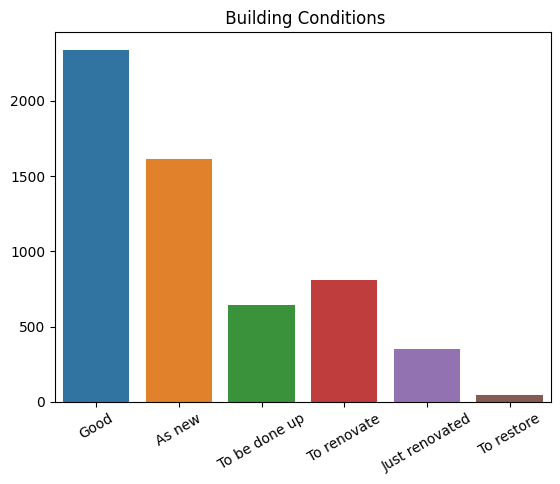

In [ ]:


filtered_Condition_df = df[df['Building condition'] != '0']

#filtered_Heating_df_order = ['Gas', 'Fuel oil', 'Electric', 'Pellet', 'Wood', 'Carbon', 'Solar']

sns.countplot(data= filtered_Condition_df, x='Building condition')

plt.xticks(rotation=30) 
plt.xlabel('')
plt.ylabel('')
plt.title(' Building Conditions')
plt.show()






In [ ]:
df.loc[df['Type of property']=='apartment'].count()

Type of property              2260
Location                      2260
postal code                   2260
immo code                     2260
Price                         2260
Address                       2260
Bedrooms                      2260
Energy class                  2260
Primary energy consumption    2260
Furnished                     2260
Terrace                       2260
Terrace surface               2260
Surface of the plot           2260
Living room surface           2260
Number of frontages           2260
Construction year             2260
Building condition            2260
Bathrooms                     2260
Shower rooms                  2260
Office                        2260
Toilets                       2260
Kitchen type                  2260
Heating type                  2260
province                      2260
Province                      2260
dtype: int64

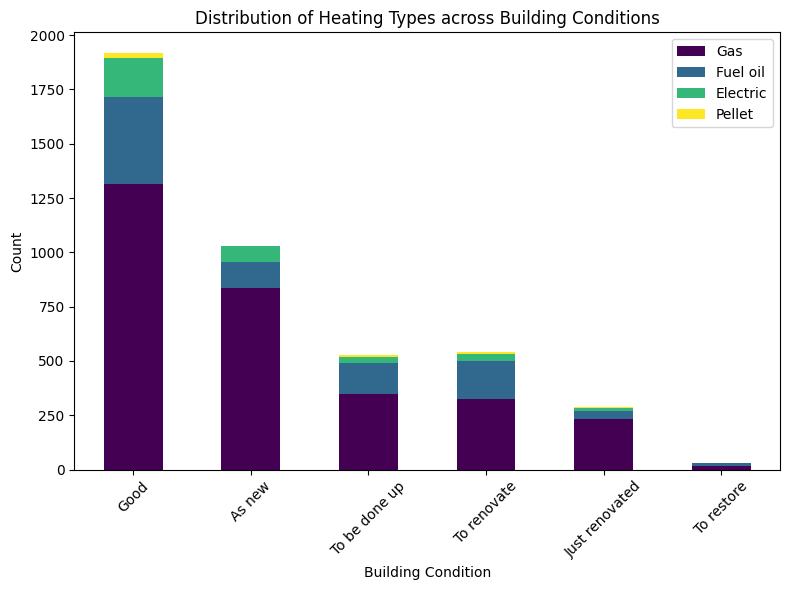

In [ ]:


filtered_Condition_df = df[df['Building condition'] != '0']


grouped_df = filtered_Condition_df.groupby(['Building condition', 'Heating type']).size().unstack(fill_value=0)


filtered_Condition_df_order = ['Good', 'As new', 'To be done up', 'To renovate','Just renovated','To restore']
heating_types = ['Gas', 'Fuel oil', 'Electric', 'Pellet']

grouped_df = grouped_df.reindex(filtered_Condition_df_order, axis=0) # The order of teh chart
grouped_df = grouped_df[heating_types]



grouped_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))

plt.xlabel('Building Condition')
plt.ylabel('Count')
plt.title('Distribution of Heating Types across Building Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()





RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

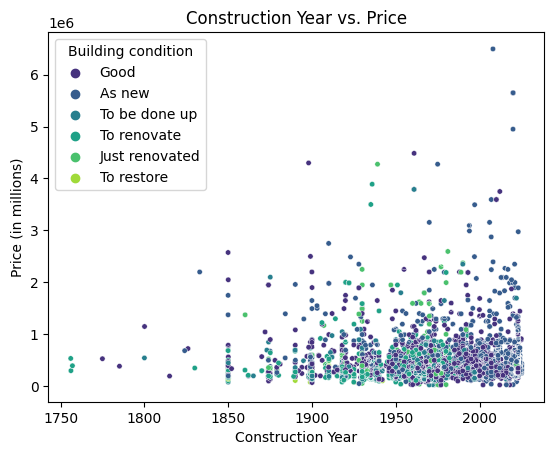

In [ ]:
filtered_Construction_df = df[df['Construction year'] != 0]
filtered_Condition_df = df[df['Building condition'] != 0]


years = filtered_Construction_df['Construction year']
prices = df['Price']
categories = filtered_Condition_df['Building condition']


size = np.random.uniform(low=-0.1, high=0.1, size=len(years))
size_years = years + size

energy_order = ['Good', 'As new', 'To be done up', 'To renovate', 'Just renovated', 'To restore']

sns.scatterplot(x=size_years, y=prices, hue=categories, palette='viridis', s=15, hue_order=energy_order)


plt.xlabel('Construction Year')
plt.ylabel('Price (in millions)')
plt.title('Construction Year vs. Price')

plt.colorbar(label='Building condition')

# Display the plot
plt.show()

In [ ]:
df.groupby(['Building condition']).count()

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province,Province
Building condition,,,,,,,,,,,,,,,,,,,,,
0,2507,2507,2507,2507,2507,2507,2507,2507,2507,2507,...,2507,2507,2507,2507,2507,2507,2507,2507,2507,2507
As new,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,...,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611
Good,2338,2338,2338,2338,2338,2338,2338,2338,2338,2338,...,2338,2338,2338,2338,2338,2338,2338,2338,2338,2338
Just renovated,351,351,351,351,351,351,351,351,351,351,...,351,351,351,351,351,351,351,351,351,351
To be done up,646,646,646,646,646,646,646,646,646,646,...,646,646,646,646,646,646,646,646,646,646
To renovate,806,806,806,806,806,806,806,806,806,806,...,806,806,806,806,806,806,806,806,806,806
To restore,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43


In [ ]:
df[df['Building condition'] != '0']['Building condition'].value_counts()

Building condition
Good              2338
As new            1611
To renovate        806
To be done up      646
Just renovated     351
To restore          43
Name: count, dtype: int64

<Figure size 800x800 with 0 Axes>

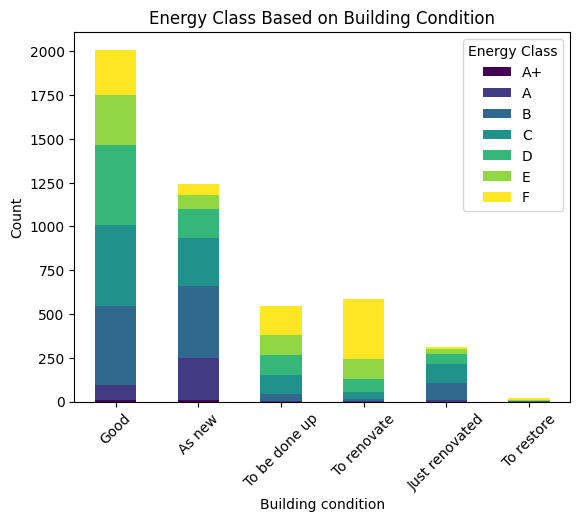

In [ ]:


filtered_Energy_df = df[df['Energy class'] != '0']
filtered_Condition_df = df[df['Building condition'] != '0']

plt.figure(figsize=(8, 8))
grouped_df = filtered_Condition_df.groupby(['Building condition', 'Energy class']).size().unstack(fill_value=0)

filtered_Condition_df_order = ['Good', 'As new', 'To be done up', 'To renovate', 'Just renovated', 'To restore']
filtered_Energy_df_order = ['A+', 'A', 'B', 'C', 'D', 'E', 'F']

grouped_df = grouped_df.reindex(filtered_Condition_df_order, axis=0)
grouped_df = grouped_df[filtered_Energy_df_order]

grouped_df.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Building condition')
plt.ylabel('Count')
plt.title('Energy Class Based on Building Condition')

plt.xticks(range(len(filtered_Condition_df_order)), filtered_Condition_df_order, rotation=45)

plt.legend(title='Energy Class')

plt.show()


In [30]:
df.to_csv('CSV_Files/Clean_House_details.csv', index=False)